# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
## 


In [1]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
from  IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# check the tensorflow version
print(tf.__version__)

2.1.0


# Pre-Checking Dataframe


In [50]:
#------------------------------------------------------
# read training dataset
#------------------------------------------------------
dir = r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\D200"
csv = dir+r"\training200-reg4.csv"
dataset = pd.read_csv(csv)
dataset


,Training,p1,p2,p3,p4,p5,p6,p7,p8,H100,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
0,148,91.49,48.95,191.22,158.24,77.95,48.40,166.823191,155.648761,44.659819,...,94.150729,93.592738,92.779003,92.610604,91.472127,91.191481,90.532050,98.766052,34.840000,2
1,55,40.11,65.06,125.62,93.76,136.81,173.59,173.169553,47.496082,40.139727,...,95.484970,94.697679,94.732838,94.280474,93.106272,92.848367,92.101352,100.271973,40.384687,2
2,41,150.29,64.30,73.71,87.27,48.01,122.82,51.191072,80.685324,37.228183,...,97.937196,97.725229,97.513061,96.907687,95.615894,95.118334,94.096054,100.909058,75.296562,2
3,31,75.46,194.08,172.19,134.55,36.87,52.13,164.391819,38.608079,40.747498,...,95.947316,95.083430,94.980127,94.504461,93.297015,93.038238,92.312350,101.355957,60.908750,2
4,84,32.16,111.79,105.47,92.16,146.26,69.83,170.868527,102.410354,41.045280,...,96.924456,96.240174,96.149891,95.620700,94.386470,94.016293,93.179479,101.620239,42.127812,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,154,177.22,111.45,139.17,167.20,55.96,93.03,188.890174,124.409090,45.106644,...,114.587992,113.798188,111.853952,109.722307,107.179547,104.794871,102.455061,121.409790,70.218125,3
193,189,167.35,87.26,114.15,29.80,134.42,145.70,176.106913,60.573016,42.369964,...,111.174895,110.277346,108.497436,106.524435,104.069101,102.073090,99.872775,122.846069,71.475625,3
194,29,158.26,182.35,180.43,68.07,151.74,71.52,168.588387,43.077276,42.561088,...,111.768751,111.701681,111.200893,109.561627,107.391684,105.840775,103.873065,127.412964,75.727500,3
195,102,33.32,66.20,199.13,81.24,131.04,40.59,190.332827,174.068496,42.534305,...,96.661155,96.140821,95.060388,94.696998,93.426343,92.925366,92.191527,101.653503,40.021250,3


In [51]:
# extract the columns from the dataset
column_names = dataset.columns
print("parameters      : {}".format(column_names[1:9]))
print("output_curves   : {}".format(column_names[9:30]))
print("output_Intrusion: {}".format(column_names[30]))
print("output_Area     : {}".format(column_names[31]))
print("output_region   : {}".format(column_names[32]))


parameters      : Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'], dtype='object')
output_curves   : Index(['H100', 'H120', 'H140', 'H160', 'H180', 'H200', 'H220', 'H240', 'H260',
       'H280', 'H300', 'H320', 'H340', 'H360', 'H380', 'H400', 'H420', 'H440',
       'H460', 'H480', 'H500'],
      dtype='object')
output_Intrusion: Intrusion
output_Area     : Area
output_region   : region


In [52]:
# pop of first column: train Maker
dataset.pop(column_names[0])
dataset.head()


,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
0,91.49,48.95,191.22,158.24,77.95,48.40,166.823191,155.648761,44.659819,51.199341,...,94.150729,93.592738,92.779003,92.610604,91.472127,91.191481,90.532050,98.766052,34.840000,2
1,40.11,65.06,125.62,93.76,136.81,173.59,173.169553,47.496082,40.139727,47.429828,...,95.484970,94.697679,94.732838,94.280474,93.106272,92.848367,92.101352,100.271973,40.384687,2
2,150.29,64.30,73.71,87.27,48.01,122.82,51.191072,80.685324,37.228183,44.919119,...,97.937196,97.725229,97.513061,96.907687,95.615894,95.118334,94.096054,100.909058,75.296562,2
3,75.46,194.08,172.19,134.55,36.87,52.13,164.391819,38.608079,40.747498,48.103415,...,95.947316,95.083430,94.980127,94.504461,93.297015,93.038238,92.312350,101.355957,60.908750,2
4,32.16,111.79,105.47,92.16,146.26,69.83,170.868527,102.410354,41.045280,48.834106,...,96.924456,96.240174,96.149891,95.620700,94.386470,94.016293,93.179479,101.620239,42.127812,2


In [53]:
#seperate data as region
dataset_2 = dataset[dataset['region']==2]
dataset_3 = dataset[dataset['region']==3]


In [54]:
dataset_3[column_names[1]]

66     155.44
67      27.22
68     115.39
69      89.23
70     107.99
        ...  
192    177.22
193    167.35
194    158.26
195     33.32
196     79.82
Name: p1, Length: 131, dtype: float64

In [55]:
# Checking: min/max for each dataset
lst_max = (dataset.max(0))
lst_min = (dataset.min(0))

lst_max_2 = (dataset_2.max(0))
lst_min_2 = (dataset_2.min(0))

lst_max_3 = (dataset_3.max(0))
lst_min_3 = (dataset_3.min(0))

print("max={}, min={} of first Column".format(lst_max_3[-3],lst_min_3[-3] ))

max=127.4129639, min=98.50408936 of first Column


In [56]:
# Define functions

def norm(x, train_stats):
  stats=train_stats
  return (x - stats['mean']) / stats['std']

model = None
def build_model(iunit, ounit, train_dataset):
    model = keras.Sequential([
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      layers.Dense(ounit)
      ])
    #optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss='mse',
      optimizer=optimizer,
      # 'mae', 'mse', 'mape'
      metrics=['mse'])

    return model  

# Training
def training(EPOCHS=1000, model=model, normed_train_data=None, train_labels=None):
    history = model.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )
    print("% : Training : end", model)
    # early stop by val_mae
    early_stop = keras.callbacks.EarlyStopping(monitor='mse', patience=1000)
    early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])                  
    return model, history, early_history        

# M/L model

In [57]:
train_dataset = dataset.sample(frac=0.7)
test_dataset  = dataset.drop(train_dataset.index)

train_dataset_2 = dataset_2.sample(frac=0.7)
test_dataset_2  = dataset_2.drop(train_dataset_2.index)

train_dataset_3 = dataset_3.sample(frac=0.7)
test_dataset_3  = dataset_3.drop(train_dataset_3.index)




In [58]:

train_dataset_3

,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
169,120.28,153.98,37.20,172.52,62.40,113.91,54.700500,115.386918,45.198082,53.364671,...,101.011586,100.671661,100.578249,100.179035,98.652602,98.330303,97.386540,112.778686,55.965000,3
137,42.14,175.90,69.57,135.40,175.99,185.09,63.894516,109.746648,43.625344,51.424142,...,97.157777,96.936928,97.411116,97.100804,95.684913,95.662799,94.770786,108.223511,33.374063,3
184,56.61,44.50,137.05,160.25,45.72,94.77,84.610057,92.273353,42.267773,49.731265,...,103.749729,103.294479,103.042977,102.668257,101.397145,100.897703,100.051652,115.954712,85.985000,3
183,120.81,56.34,27.08,95.35,47.60,153.55,94.643444,170.175563,42.587893,51.733012,...,103.582946,103.064989,102.972149,102.437218,100.809595,100.402148,99.291375,115.892456,75.640312,3
87,127.59,29.43,149.30,53.62,111.53,149.39,69.515478,30.406883,37.549133,45.883659,...,99.043087,98.882311,98.053148,97.133512,95.480924,94.525043,93.200990,102.584045,59.205937,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,146.38,46.69,72.09,70.58,54.50,187.40,34.099883,93.186626,42.438085,51.673314,...,104.174293,104.128136,104.119811,103.371602,101.785994,101.116092,99.780849,113.918152,70.035938,3
190,148.57,162.94,93.14,45.06,89.47,127.05,153.073659,193.365141,43.581321,54.979700,...,110.326811,109.894663,109.136733,107.444685,105.254614,103.625034,101.644112,119.682373,56.623750,3
89,148.32,150.78,35.77,151.33,85.35,125.39,186.313036,89.989397,39.957816,47.598930,...,94.569109,94.678155,95.172499,94.477762,93.041295,92.600175,91.461677,102.829163,39.077500,3
126,182.14,51.74,196.72,120.92,104.66,39.76,101.813264,153.458888,42.234618,50.680453,...,100.174198,99.874478,98.930787,98.238078,96.572175,95.925949,94.761884,107.286804,64.451250,3


In [59]:
# # make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()

train_stats_2 = train_dataset_2.describe()
train_stats_3 = train_dataset_3.describe()

train_stats_3.head()


,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0
mean,118.738478,112.252065,105.820109,112.460543,101.068587,116.699130,105.988661,118.071200,40.625265,48.906348,...,99.988274,99.810458,99.708711,98.920810,97.362860,96.656381,95.437613,108.416532,60.943988,3.0
std,48.305793,49.900625,49.504803,51.815964,48.084795,46.995026,48.441086,50.589432,1.914004,2.369581,...,4.865647,4.648508,4.342170,4.139052,4.005844,3.809157,3.691520,5.877252,18.018642,0.0
min,26.230000,26.900000,25.330000,25.430000,30.390000,31.200000,32.060778,30.406883,36.391768,43.530597,...,91.528053,91.745027,91.975962,91.391237,90.077826,89.639066,88.642550,98.504089,14.890000,3.0
25%,83.192500,67.835000,62.857500,67.890000,61.105000,75.612500,67.435552,76.894297,39.286808,47.170219,...,96.877254,96.578095,96.670579,95.825730,94.293639,93.822100,92.788063,104.522659,50.438359,3.0


In [60]:
# # delete "Area" column from "train_stats"
for col in column_names[9:33]:
    train_stats.pop(col)
    train_stats_2.pop(col)
    train_stats_3.pop(col)

train_stats   = train_stats.transpose()    
train_stats_2 = train_stats_2.transpose()
train_stats_3 = train_stats_3.transpose()



In [61]:
train_stats_3

,count,mean,std,min,25%,50%,75%,max
p1,92.0,118.738478,48.305793,26.230000,83.192500,121.745000,155.847500,199.780000
p2,92.0,112.252065,49.900625,26.900000,67.835000,114.965000,155.295000,197.550000
p3,92.0,105.820109,49.504803,25.330000,62.857500,102.885000,143.077500,198.580000
p4,92.0,112.460543,51.815964,25.430000,67.890000,118.535000,154.877500,198.470000
p5,92.0,101.068587,48.084795,30.390000,61.105000,95.445000,136.742500,199.470000
p6,92.0,116.699130,46.995026,31.200000,75.612500,117.840000,156.430000,199.500000
p7,92.0,105.988661,48.441086,32.060778,67.435552,103.625687,143.625467,199.983481
p8,92.0,118.071200,50.589432,30.406883,76.894297,118.317323,161.802710,198.459481


In [62]:
# make instances for dataset without the QoI
train_labels_Reg = pd.DataFrame(None)
test_labels__Reg = pd.DataFrame(None)
train_labels_Intr = pd.DataFrame(None)
test_labels__Intr = pd.DataFrame(None)
train_labels_Area = pd.DataFrame(None)
test_labels__Area = pd.DataFrame(None)

train_labels_Intr_2 = pd.DataFrame(None)
test_labels__Intr_2 = pd.DataFrame(None)
train_labels_Area_2 = pd.DataFrame(None)
test_labels__Area_2 = pd.DataFrame(None)

train_labels_Intr_3 = pd.DataFrame(None)
test_labels__Intr_3 = pd.DataFrame(None)
train_labels_Area_3 = pd.DataFrame(None)
test_labels__Area_3 = pd.DataFrame(None)

# for i in range(9,33):
#     train_labels[column_names[i]]=train_dataset.pop(column_names[i])
#     test_labels[column_names[i]]=test_dataset.pop(column_names[i])

for i in range(9,33):
    if i == 30:
        train_labels_Intr[column_names[i]] = train_dataset.pop(column_names[i])
        test_labels__Intr[column_names[i]] = test_dataset.pop(column_names[i]) 

        train_labels_Intr_2[column_names[i]] = train_dataset_2.pop(column_names[i])
        test_labels__Intr_2[column_names[i]] = test_dataset_2.pop(column_names[i]) 
        train_labels_Intr_3[column_names[i]] = train_dataset_3.pop(column_names[i])
        test_labels__Intr_3[column_names[i]] = test_dataset_3.pop(column_names[i]) 
    elif i == 31:
        train_labels_Area[column_names[i]] = train_dataset.pop(column_names[i])
        test_labels__Area[column_names[i]] = test_dataset.pop(column_names[i])  

        train_labels_Area_2[column_names[i]] = train_dataset_2.pop(column_names[i])
        test_labels__Area_2[column_names[i]] = test_dataset_2.pop(column_names[i])  
        train_labels_Area_3[column_names[i]] = train_dataset_3.pop(column_names[i])
        test_labels__Area_3[column_names[i]] = test_dataset_3.pop(column_names[i])  
    elif i == 32:
        train_labels_Reg[column_names[i]] = train_dataset.pop(column_names[i])
        test_labels__Reg[column_names[i]] = test_dataset.pop(column_names[i])
        train_dataset_2.pop(column_names[i])
        test_dataset_2.pop(column_names[i])
        train_dataset_3.pop(column_names[i])
        test_dataset_3.pop(column_names[i])  
    else:
        train_dataset.pop(column_names[i])
        test_dataset.pop(column_names[i])

        train_dataset_2.pop(column_names[i])
        test_dataset_2.pop(column_names[i])
        train_dataset_3.pop(column_names[i])
        test_dataset_3.pop(column_names[i])        

normed_train_data = norm( train_dataset, train_stats )
normed_test_data  = norm( test_dataset, train_stats )
normed_train_data_2 = norm( train_dataset_2,train_stats_2 )
normed_test_data_2  = norm( test_dataset_2,train_stats_2 )
normed_train_data_3 = norm( train_dataset_3,train_stats_3 )
normed_test_data_3  = norm( test_dataset_3,train_stats_3 )  
# normed_train_data_Area = norm( train_labels_Area )
# normed_test_data_Area  = norm(  test_labels__Area )



In [63]:
train_dataset_2.head()

,p1,p2,p3,p4,p5,p6,p7,p8
52,64.94,38.41,162.03,140.08,159.08,38.52,64.949816,181.605397
50,48.45,39.69,79.39,173.27,133.02,182.81,197.323101,84.242124
27,111.65,138.40,80.94,199.75,166.69,96.13,172.628525,128.818788
20,85.92,107.86,169.25,182.38,72.41,84.85,186.928435,98.190834
61,45.88,70.69,128.69,71.98,189.52,117.15,71.017949,103.473318


In [64]:
test_dataset_3.head()

,p1,p2,p3,p4,p5,p6,p7,p8
71,186.44,178.64,122.63,101.36,97.61,162.63,108.609637,95.999262
76,110.48,117.46,182.15,59.70,118.42,166.62,174.188065,143.999345
77,65.70,134.76,117.29,178.72,64.83,134.40,46.516354,45.117054
81,74.27,124.80,28.16,64.95,181.45,92.62,193.542007,116.547151
91,100.16,100.63,127.88,89.73,168.28,35.05,51.278200,35.681297


In [65]:
# # create the model instance 
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Reg = build_model(iunit, ounit, train_dataset)
model_Reg, model_Reg_history, model_Reg_early_history = training(EPOCHS, model_Reg, normed_train_data, train_labels_Reg)

model_Reg.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Intr_for_Zone_Reg.h5')

....................................................................................................
Epoch: 4900, loss:0.0216,  mse:0.0088,  val_loss:0.4406,  val_mse:0.4277,  
....................................................................................................
Epoch: 5000, loss:0.0216,  mse:0.0089,  val_loss:0.4376,  val_mse:0.4249,  
....................................................................................................
Epoch: 5100, loss:0.0212,  mse:0.0085,  val_loss:0.4463,  val_mse:0.4337,  
....................................................................................................
Epoch: 5200, loss:0.0213,  mse:0.0088,  val_loss:0.4492,  val_mse:0.4367,  
....................................................................................................
Epoch: 5300, loss:0.0207,  mse:0.0083,  val_loss:0.4425,  val_mse:0.4301,  
....................................................................................................
Epoch: 5400, l

In [66]:
test_mae_score_Reg, test_mae_score1_Reg = model_Reg.evaluate(  normed_test_data, test_labels__Reg  )
print(test_mae_score_Reg, test_mae_score1_Reg)


59/59 [==============================] - 0s 84us/sample - loss: 0.3836 - mse: 0.3752
0.3835519658306898 0.3752295


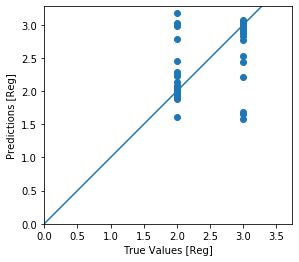

In [129]:
predictions = model_Reg.predict(normed_train_data).flatten()

plt.scatter(train_labels_Reg, predictions)
plt.xlabel('True Values [Reg]')
plt.ylabel('Predictions [Reg]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

Text(0, 0.5, 'MSE')

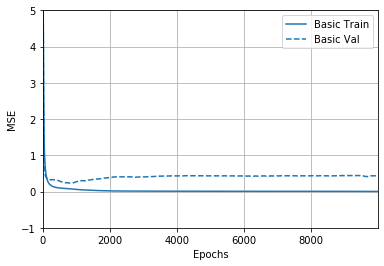

In [67]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Reg_history}, metric = "mse")
plt.ylim([-1, 5])
plt.ylabel('MSE')

In [131]:
# # create the model instance 
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr = build_model(iunit, ounit, train_dataset)
model_Intr, model_Intr_history, model_Intr_early_history = training(EPOCHS, model_Intr, normed_train_data, train_labels_Intr)

model_Intr.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Intr_for_Zone.h5')

..........................................................
Epoch: 900, loss:59.0715,  mse:58.6901,  val_loss:119.0000,  val_mse:118.6187,  
....................................................................................................
Epoch: 1000, loss:50.5112,  mse:50.1475,  val_loss:115.4187,  val_mse:115.0550,  
....................................................................................................
Epoch: 1100, loss:42.6704,  mse:42.3237,  val_loss:115.2989,  val_mse:114.9523,  
....................................................................................................
Epoch: 1200, loss:35.2266,  mse:34.8978,  val_loss:110.2903,  val_mse:109.9616,  
....................................................................................................
Epoch: 1300, loss:30.1034,  mse:29.7889,  val_loss:106.8672,  val_mse:106.5528,  
....................................................................................................
Epoch: 1400, loss:25.6706, 

In [69]:
test_mae_score_Intr, test_mae_score1_Intr = model_Intr.evaluate(  normed_test_data, test_labels__Intr  )
print(test_mae_score_Intr, test_mae_score1_Intr)

59/59 [==============================] - 0s 68us/sample - loss: 133.5394 - mse: 133.1571
133.53935164112156 133.15706


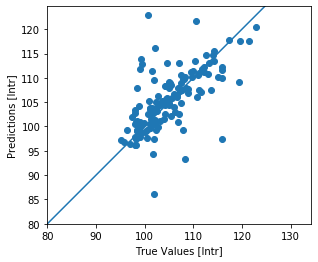

In [132]:
predictions = model_Intr.predict(normed_train_data).flatten()

plt.scatter(train_labels_Intr, predictions)
plt.xlabel('True Values [Intr]')
plt.ylabel('Predictions [Intr]')
plt.axis('equal')
plt.axis('square')
plt.xlim([80,plt.xlim()[1]])
plt.ylim([80,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

Text(0, 0.5, 'MSE_Intr')

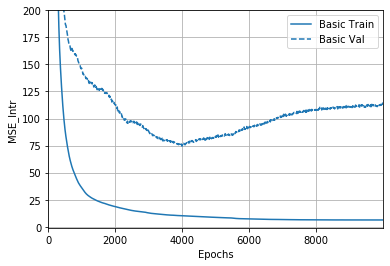

In [70]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_history}, metric = "mse")
plt.ylim([-1, 200])
plt.ylabel('MSE_Intr')

In [71]:
# # create the model for intusion by region_2
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr_2 = build_model(iunit, ounit,train_dataset_2)
model_Intr_2, model_Intr_2_history, model_Intr_2_early_history = training(EPOCHS, model_Intr_2, normed_train_data_2, train_labels_Intr_2)

model_Intr_2.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Intr_for_Zone_2.h5')

4594.3091,  val_mse:4593.9971,  
....................................................................................................
Epoch: 400, loss:672.3295,  mse:671.9389,  val_loss:2195.5369,  val_mse:2195.1460,  
....................................................................................................
Epoch: 500, loss:230.9941,  mse:230.5853,  val_loss:1432.1040,  val_mse:1431.6951,  
....................................................................................................
Epoch: 600, loss:140.1811,  mse:139.7738,  val_loss:1310.9003,  val_mse:1310.4930,  
....................................................................................................
Epoch: 700, loss:104.5813,  mse:104.1774,  val_loss:1233.6669,  val_mse:1233.2629,  
....................................................................................................
Epoch: 800, loss:85.0373,  mse:84.6371,  val_loss:1164.1322,  val_mse:1163.7322,  
.......................................

In [72]:
test_mae_score_Intr_2, test_mae_score1_Intr_2 = model_Intr_2.evaluate(  normed_test_data_2, test_labels__Intr_2  )
print(test_mae_score_Intr_2, test_mae_score1_Intr_2)

20/20 [==============================] - 0s 50us/sample - loss: 88.4824 - mse: 88.2732
88.482421875 88.273224


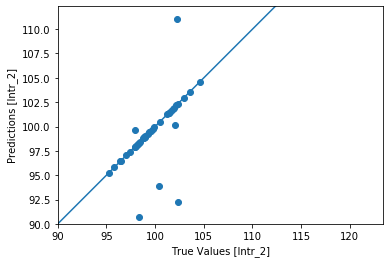

In [126]:
predictions = model_Intr_2.predict(normed_train_data_2).flatten()

plt.scatter(train_labels_Intr_2, predictions)
plt.xlabel('True Values [Intr_2]')
plt.ylabel('Predictions [Intr_2]')
plt.axis('equal')
plt.axis('square')
plt.xlim([90,plt.xlim()[1]])
plt.ylim([90,plt.ylim()[1]])
_ = plt.plot([90, 150], [90, 150])

Text(0, 0.5, 'MSE_Intr_2')

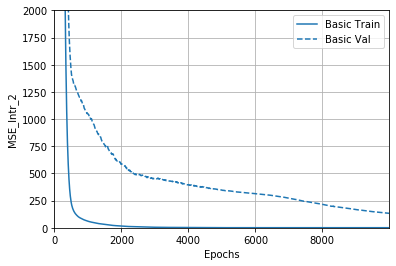

In [73]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_2_history}, metric = "mse")
plt.ylim([-1, 2000])
plt.ylabel('MSE_Intr_2')

In [74]:
# # create the model for intusion by region_3
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr_3 = build_model(iunit, ounit,train_dataset_3)
model_Intr_3, model_Intr_3_history, model_Intr_3_early_history = training( EPOCHS, model_Intr_3, normed_train_data_3, train_labels_Intr_3 )

model_Intr_3.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Intr_for_Zone_3.h5')

....................................................
Epoch: 4500, loss:2.5961,  mse:2.2164,  val_loss:165.5271,  val_mse:165.1475,  
....................................................................................................
Epoch: 4600, loss:2.4024,  mse:2.0233,  val_loss:162.6336,  val_mse:162.2546,  
....................................................................................................
Epoch: 4700, loss:2.2744,  mse:1.8956,  val_loss:160.4651,  val_mse:160.0863,  
....................................................................................................
Epoch: 4800, loss:2.1828,  mse:1.8034,  val_loss:161.5486,  val_mse:161.1693,  
....................................................................................................
Epoch: 4900, loss:2.1284,  mse:1.7489,  val_loss:163.5307,  val_mse:163.1511,  
....................................................................................................
Epoch: 5000, loss:2.0363,  mse:1.6567,  va

Text(0, 0.5, 'MSE_Intr_3')

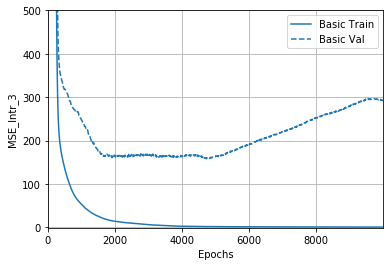

In [75]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_3_history}, metric = "mse")
plt.ylim([-1, 500])
plt.ylabel('MSE_Intr_3')

In [76]:
test_mae_score_Intr_3, test_mae_score1_Intr_3 = model_Intr_3.evaluate(  normed_test_data_3, test_labels__Intr_3  )
print(test_mae_score_Intr_3, test_mae_score1_Intr_3)

39/39 [==============================] - 0s 153us/sample - loss: 207.6345 - mse: 207.3063
207.63446827423877 207.30632


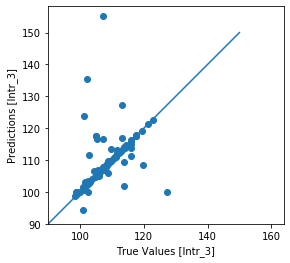

In [133]:
predictions = model_Intr_3.predict(normed_train_data_3).flatten()

plt.scatter(train_labels_Intr_3, predictions)
plt.xlabel('True Values [Intr_3]')
plt.ylabel('Predictions [Intr_3]')
plt.axis('equal')
plt.axis('square')
plt.xlim([90,plt.xlim()[1]])
plt.ylim([90,plt.ylim()[1]])
_ = plt.plot([90, 150], [90, 150])

In [77]:
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Area = build_model(iunit, ounit, train_dataset)
model_Area, model_Area_history, model_Area_early_history = training(EPOCHS, model_Area, normed_train_data, train_labels_Area)

model_Area.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Area_for_Zone.h5')

Epoch: 9000, loss:6.0013,  mse:5.2509,  val_loss:254.9010,  val_mse:254.1505,  
....................................................................................................
Epoch: 9100, loss:5.6975,  mse:4.9461,  val_loss:259.1462,  val_mse:258.3948,  
....................................................................................................
Epoch: 9200, loss:5.4727,  mse:4.7205,  val_loss:264.1426,  val_mse:263.3904,  
....................................................................................................
Epoch: 9300, loss:5.2062,  mse:4.4535,  val_loss:264.9804,  val_mse:264.2277,  
....................................................................................................
Epoch: 9400, loss:4.9581,  mse:4.2059,  val_loss:266.7642,  val_mse:266.0119,  
....................................................................................................
Epoch: 9500, loss:4.7355,  mse:3.9827,  val_loss:267.8165,  val_mse:267.0638,  
...............

In [78]:
test_mae_score_Area, test_mae_score1_Area = model_Area.evaluate(  normed_test_data, test_labels__Area  )
print(test_mae_score_Area, test_mae_score1_Area)

59/59 [==============================] - 0s 51us/sample - loss: 303.6421 - mse: 303.0158
303.64210691290384 303.01578


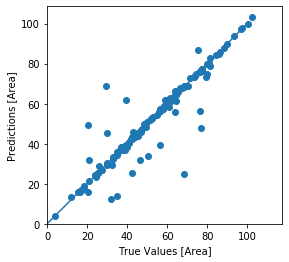

In [120]:
predictions = model_Area.predict(normed_train_data).flatten()

plt.scatter(train_labels_Area, predictions)
plt.xlabel('True Values [Area]')
plt.ylabel('Predictions [Area]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Text(0, 0.5, 'MSE_Area')

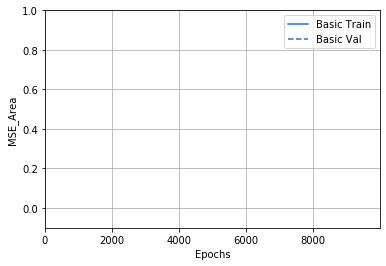

In [80]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Area_history}, metric = "mse")
plt.ylim([-0.1, 400])
plt.ylabel('MSE_Area')

In [81]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([-1, 10])
# plt.ylabel('MAE')

In [82]:
# study for dataframe
# data = {'a':[1,2,3.0],'b':[0.1,0.2,0.3],'sub':['1st','2nd','3nd']}
# df = pd.DataFrame(data)
# df
# df = pd.DataFrame(data, columns=['sub','a','b'])
# df
# df = df.reindex(index = [0,2,1])
# df
# df['c']=np.nan
# df
# df.loc[:,['c']]=[1,2,3]
# df

In [83]:
# model evaluate by curve
# model = keras.models.load_model(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_for_Zone.h5')
# test_predictions = model.predict(normed_test_data).flatten()
# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))


# Optimization

In [84]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [85]:
# Number of Curve points
point = 39
# Number of variables 
var = 8

In [86]:
# predict_func
# Mean square error between test and prediction

def predict_func( lst ):
    import math
    # # Result of prediction data  
    
    lstVar  = [ var  for var  in lst    ]

    lstVarN = [ norm(varN, train_stats) for varN in lstVar ]

    predict_Reg  = model_Reg.predict( [lstVarN] )[0]
    predict_Intr = model_Intr.predict( [lstVarN] )[0]

    predict_Intr_2 = model_Intr_2.predict( [lstVarN] )[0]
    predict_Intr_3 = model_Intr_3.predict( [lstVarN] )[0]

    predict_Area = model_Area.predict( [lstVarN] )[0]

    # cVal = 0
    # sInt = 0 
    # sAre = 0
    # sReg = 0

    # for i in range(0,len(predict)):
    #     if i <= 20: # curve data
    #         cVal = cVal + predict[i]
    #     if i == 21: # max. intrusion
    #         sInt = predict[i]
    #     if i == 22: # area
    #         sAre = predict[i]
    #     if i == 23: # region
    #         sReg = predict[i]

    # lst_max = (dataset.max(0))
    # lst_min = (dataset.min(0))
    # print("max={}, min={} of first Column".format(lst_max[1],lst_min[1] ))


    

    if predict_Reg < 2.5:
        predict_Intr = predict_Intr_2
    else:
        predict_Intr = predict_Intr_3

    norm_Int  = math.sqrt( ((predict_Intr - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 
    norm_Int_2  = math.sqrt( ((predict_Intr_2 - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 
    norm_Int_3  = math.sqrt( ((predict_Intr_3 - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 

    norm_Area = math.sqrt( ((predict_Area - lst_min[30])/(lst_max[30] - lst_min[30]))**2 ) 


    # print("min: {}, max: {}".format(lst_min[30], lst_max[30]))
    print("parameter: {}".format(predict_Reg))
    print("Region: {}, Intursion: {}, Area: {}".format(predict_Reg, predict_Intr, predict_Area))

    # weight1 = 0.2


    return  norm_Area


In [87]:
normed_train_data_3

,p1,p2,p3,p4,p5,p6,p7,p8
169,0.031912,0.836221,-1.386130,1.159092,-0.804175,-0.059349,-1.058774,-0.053060
137,-1.585700,1.275494,-0.732254,0.442710,1.558110,1.455279,-0.868976,-0.164551
184,-1.286150,-1.357740,0.630846,0.922292,-1.151062,-0.466627,-0.441332,-0.509945
183,0.042884,-1.120468,-1.590555,-0.330218,-1.111965,0.784144,-0.234206,1.029946
87,0.183239,-1.659740,0.878296,-1.135568,0.217562,0.695624,-0.752939,-1.732858
...,...,...,...,...,...,...,...,...
175,0.572220,-1.313853,-0.681350,-0.808256,-0.968468,1.504433,-1.484046,-0.491893
190,0.617556,1.015778,-0.256139,-1.300768,-0.241211,0.220255,0.972005,1.488333
89,0.612380,0.772093,-1.415016,0.750144,-0.326893,0.184932,1.658187,-0.555092
126,1.312503,-1.212651,1.836183,0.163260,0.074689,-1.637176,-0.086195,0.699508


In [88]:
# 1st
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


n: [3.0619977], Intursion: [105.019104], Area: [11.616748]
parameter: [3.0630038]
Region: [3.0630038], Intursion: [105.03494], Area: [11.560021]
parameter: [3.0554016]
Region: [3.0554016], Intursion: [104.915344], Area: [11.973252]
parameter: [3.0654283]
Region: [3.0654283], Intursion: [105.073074], Area: [11.423314]
parameter: [3.0624356]
Region: [3.0624356], Intursion: [105.026], Area: [11.592042]
parameter: [3.0677972]
Region: [3.0677972], Intursion: [105.11035], Area: [11.34593]
parameter: [3.0738297]
Region: [3.0738297], Intursion: [105.205246], Area: [11.390249]
parameter: [3.0706525]
Region: [3.0706525], Intursion: [105.15527], Area: [11.366907]
parameter: [3.0849714]
Region: [3.0849714], Intursion: [105.38054], Area: [11.472097]
parameter: [3.0704832]
Region: [3.0704832], Intursion: [105.1526], Area: [11.3656645]
parameter: [3.0689588]
Region: [3.0689588], Intursion: [105.12863], Area: [11.3544655]
parameter: [3.057784]
Region: [3.057784], Intursion: [104.952835], Area: [11.854

In [89]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([135.44497568, 138.06427369, 172.53571666, 157.2851467 ,
        175.01546204,  33.16597184, 190.69550695,  62.77399751]),
 0.07618235858275255)

In [90]:
#Second
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

on: [3.105825], Intursion: [105.708595], Area: [11.625288]
parameter: [3.084432]
Region: [3.084432], Intursion: [105.372055], Area: [11.468135]
parameter: [3.0704558]
Region: [3.0704558], Intursion: [105.152176], Area: [11.365466]
parameter: [3.057079]
Region: [3.057079], Intursion: [104.941734], Area: [11.891972]
parameter: [3.0708413]
Region: [3.0708413], Intursion: [105.15824], Area: [11.368295]
parameter: [3.0828395]
Region: [3.0828395], Intursion: [105.347], Area: [11.456437]
parameter: [3.0605156]
Region: [3.0605156], Intursion: [104.9958], Area: [11.700297]
parameter: [3.1076221]
Region: [3.1076221], Intursion: [105.73687], Area: [11.638488]
parameter: [3.0642421]
Region: [3.0642421], Intursion: [105.05443], Area: [11.490194]
parameter: [3.0829608]
Region: [3.0829608], Intursion: [105.34889], Area: [11.457326]
parameter: [3.07546]
Region: [3.07546], Intursion: [105.230896], Area: [11.402224]
parameter: [3.0578716]
Region: [3.0578716], Intursion: [104.95419], Area: [11.8494005]
p

In [91]:
# 2nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([135.44531303, 145.75603512,  93.55514566, 130.32247071,
         31.42954262, 140.96079628, 112.57092732,  77.04214657]),
 0.07618322960270175)

In [92]:
#Third
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

ntursion: [105.147026], Area: [11.363057]
parameter: [3.054344]
Region: [3.054344], Intursion: [104.8987], Area: [12.024499]
parameter: [3.0671394]
Region: [3.0671394], Intursion: [105.100006], Area: [11.351993]
parameter: [3.1521986]
Region: [3.1521986], Intursion: [106.43814], Area: [11.965953]
parameter: [3.0769756]
Region: [3.0769756], Intursion: [105.254745], Area: [11.41336]
parameter: [3.0672965]
Region: [3.0672965], Intursion: [105.10248], Area: [11.348203]
parameter: [3.0727756]
Region: [3.0727756], Intursion: [105.188675], Area: [11.382505]
parameter: [3.0714793]
Region: [3.0714793], Intursion: [105.168274], Area: [11.372979]
parameter: [3.0729384]
Region: [3.0729384], Intursion: [105.19124], Area: [11.383697]
parameter: [3.0575042]
Region: [3.0575042], Intursion: [104.948425], Area: [11.870099]
parameter: [3.0647488]
Region: [3.0647488], Intursion: [105.06239], Area: [11.461633]
parameter: [3.0701025]
Region: [3.0701025], Intursion: [105.14661], Area: [11.362866]
parameter: 

In [93]:
# 3nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([135.44636024, 102.59018481,  74.59845274, 174.29313215,
        110.53254466,  83.40184079, 168.20279574, 116.42830584]),
 0.07618698557115956)

In [94]:
# normed_test_data

# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))